In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import urllib3
import certifi
from bs4 import BeautifulSoup
from textblob import TextBlob

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np

In [6]:
import os

In [7]:
from pandas import DataFrame

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deark\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\deark\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [9]:
def clean_data(df):
#     df = web.DataReader(stock_name, 'yahoo', '2018-7-1', '2020-7-1')['Open']
    
    df = df.div(df[0])
    
    data = df.tolist()
    
    data_input = []
    data_output = []

    size = len(data)
    # size = len(data)

    for i in range(50, size):
        data_input.append(data[i-50:i])
        data_output.append([data[i]])
        
    return data_input, data

In [10]:
def predict(slice_point, days_predicted, data_input, data):
    
    predictions = []
    predictions = model.predict(data_input[0:slice_point])
    predictions = predictions.reshape(len(predictions)).tolist()
    
    for i in range(0, days_predicted):
        predictions.append(float(model.predict([predictions[len(predictions)-numInp:len(predictions)]])[0][0])* (1 + (np.random.normal()/100)))
    
#     DataFrame(predictions, columns=['Data'])['Data'].plot(figsize=(16,6))
#     DataFrame(data[numInp:], columns=['Data'])['Data'].plot()

    return DataFrame(predictions, columns=['Price'])['Price']

In [44]:
def pie_portfolio(values, names, num_sectors):
    max_sectors = sorted(values, reverse=True)[:num_sectors]
    
    sector_names = []
    
    for value in max_sectors:
        sector_names.append(names[values.index(value)])
        
    plt.pie(max_sectors, labels = sector_names)
    
    total_score = sum(max_sectors)

    for i in range(0, len(max_sectors)):
        print(sector_names[i] + ': ' + str(max_sectors[i]/total_score * 100) + '%')
        

In [12]:
def google_news(search_param):
    
    search_param = search_param.replace(' ', '%20')
    
    http = urllib3.PoolManager(
    cert_reqs='CERT_REQUIRED',
    ca_certs=certifi.where())

    num_pages = 8

    search = 'https://www.google.com/search?q=' + search_param +'&tbm=nws&start='
    
    news_titles = []
    news_info = []

    for i in range(num_pages):
        r = http.request('GET', search + str(i*10))
        soup = BeautifulSoup(r.data, 'html.parser')
        news_titles.append(soup.find_all("div", {"class": "BNeawe vvjwJb AP7Wnd"}))
        news_info.append(soup.find_all("div", {"class": "BNeawe s3v9rd AP7Wnd"}))
        
    for i in range(num_pages):
        for j in range(len(news_titles[i])):
            news_titles[i][j] = str(news_titles[i][j])[34:len(news_titles[i][j])-7]

        for k in range(len(news_info[i])):
            if k%2 == 0:
                news_info[i][k] = ""
            else:
                news_info[i][k] = str(news_info[i][k])[117:len(news_info[i][k])-9]

        while('' in news_info[i]) : 
            news_info[i].remove('')
        
    numPositive = 0
    numNegative = 0

    for i in range(len(news_titles)):
        for j in range(len(news_titles[i])):
            blob = TextBlob(news_titles[i][j])
            for sentence in blob.sentences:
                polarity_val = sentence.sentiment.polarity
                if polarity_val != 0:
                    if polarity_val < 0.1: numNegative+=1
                    else: numPositive+=1


    for i in range(len(news_info)):
        for j in range(len(news_info[i])):
            blob = TextBlob(news_info[i][j])
            for sentence in blob.sentences:
                polarity_val = sentence.sentiment.polarity
                if polarity_val != 0:
                    if polarity_val < 0.1: numNegative+=1
                    else: numPositive+=1
    
    return (numPositive/(numPositive + numNegative))-(numNegative/(numPositive + numNegative))

In [13]:
sectors = ['CommunicationServices', 'ConsumerDiscretionary',
           'ConsumerStaples', 'Energy', 'Financials',
           'HealthCare', 'Industrials', 'Materials',
           'RealEstate', 'Technology', 'Utilities']

In [14]:
dataset = [None, None, None, None, None, None, None, None, None, None, None]

In [15]:
for i in range(0, len(sectors)):
    dataset[i] = pd.read_excel('Data/' + sectors[i] +'.xls', index_col=0)

In [16]:
numInp = 50
model = tf.keras.models.load_model('stock_model.h5')

In [17]:
for i in range(0, len(dataset)):
    dataset[i] = dataset[i].div(dataset[i]['Price'][0])

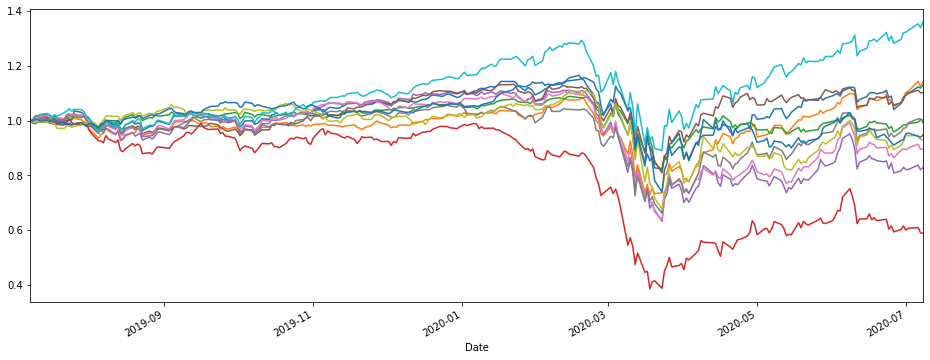

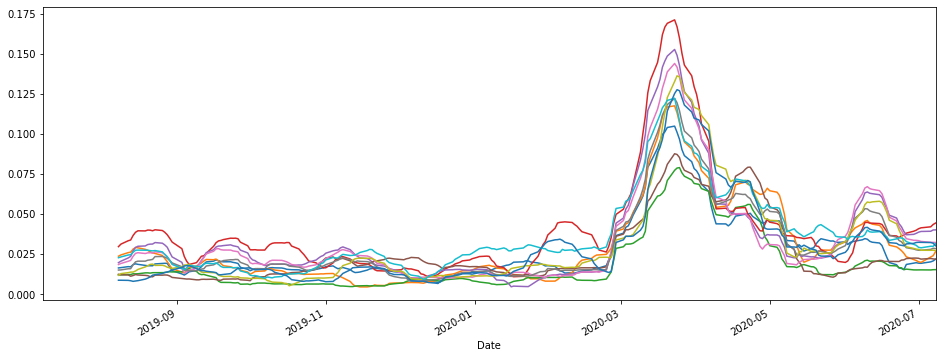

0.7485655905656424
1.5960283378421232
1.1756586734111063
-2.8673731997926155
-1.6304660463665592
0.819448869653064
-0.4709615848752827
0.9951972084322
0.22657021215498455
1.5776401485189513
0.5749695745584381


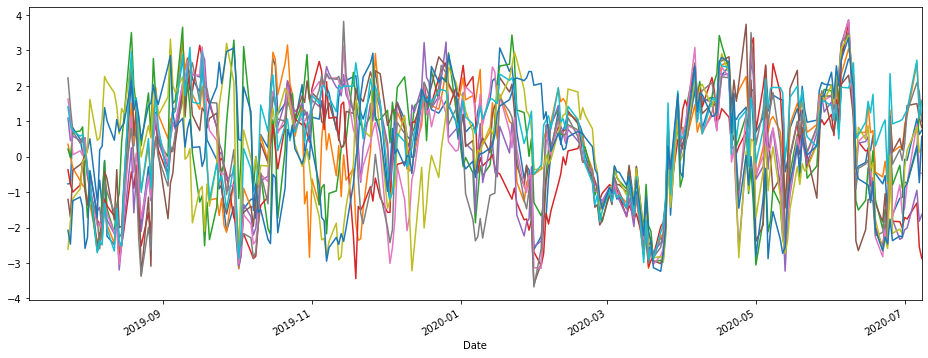

In [18]:
for i in range(0, len(dataset)):
    dataset[i]['Price'].plot(figsize=(16,6))
    
plt.show()

for i in range(0, len(dataset)):
    dataset[i]['Price'].rolling(24).std().plot(figsize=(16,6))

plt.show()

for i in range(0, len(dataset)):
    df_copy = dataset[i].copy()
    for j in range(0, len(dataset[i])):
        df_copy['Price'][j] = (dataset[i]['Price'][j] - dataset[i]['Price'][j-10]) / (dataset[i]['Price'][j-12:j+12].std())
        
    df_copy['Price'].plot(figsize=(16,6))
    
    print(df_copy['Price'][len(df_copy)-1])
    
plt.show()

In [19]:
ml_dataframe = [None, None, None, None, None, None, None, None, None, None, None]

In [20]:
sector_scores = [0,0,0,0,0,0,0,0,0,0,0]

In [50]:
for i in range(0, len(dataset)):
    data_input, data = clean_data(dataset[i]['Price'])
    ml_dataframe[i] = predict(len(data)-75, 75, data_input, data)

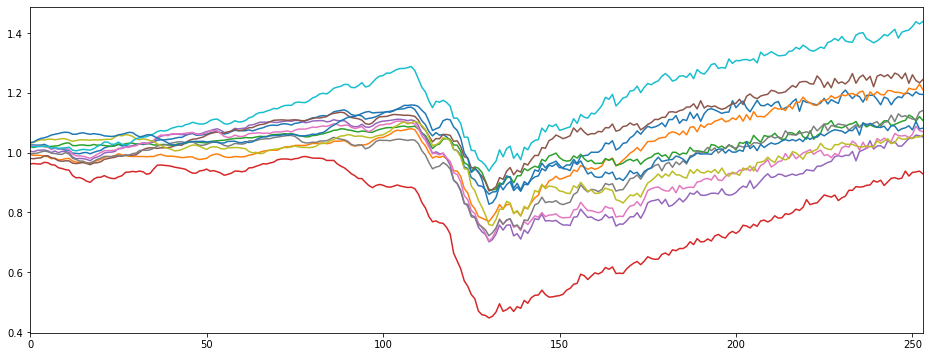

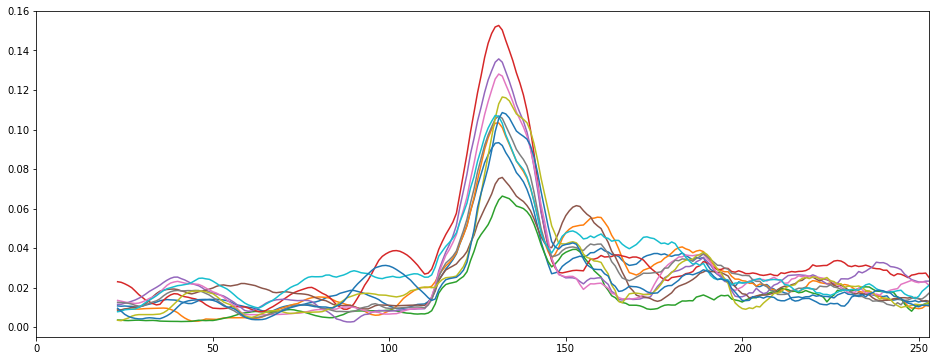

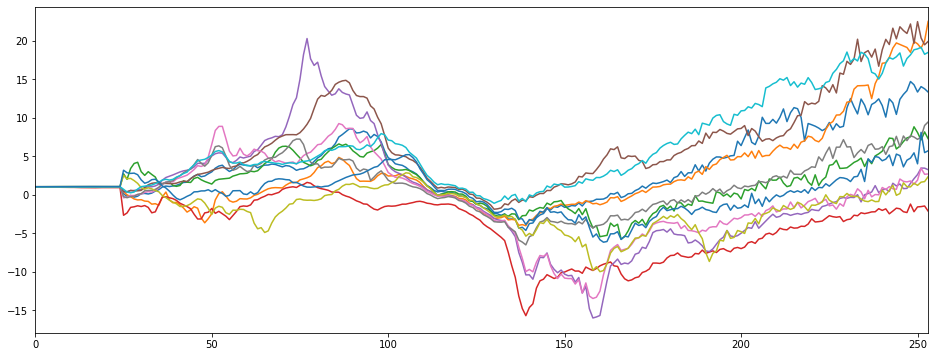

In [51]:
for i in range(0, len(ml_dataframe)):
    ml_dataframe[i].plot(figsize=(16,6))
    
plt.show()

for i in range(0, len(ml_dataframe)):
    ml_dataframe[i].rolling(24).std().plot(figsize=(16,6))

plt.show()

for i in range(0, len(ml_dataframe)):
    df_copy = ml_dataframe[i].copy()
    for j in range(25, len(ml_dataframe[i])):
        df_copy[j] = (ml_dataframe[i][j] - ml_dataframe[i][j-j]) / (ml_dataframe[i][j-15:j+15].std())
        
    df_copy.plot(figsize=(16,6))
    
    sector_scores[i] = df_copy[len(df_copy)-1]
    
plt.show()

In [52]:
print(sector_scores)

[13.32177685320837, 22.487323171110468, 7.270922864807256, -2.1362870379976484, 3.2387695057453576, 19.8957548718835, 2.685470660505623, 9.436409265662524, 2.3307684889572555, 18.471673854312872, 5.692001360991549]


ConsumerDiscretionary: 22.529084942121926%
HealthCare: 19.932703776505782%
Technology: 18.505978062414137%
CommunicationServices: 13.34651705861993%
Materials: 9.453933857625934%
ConsumerStaples: 7.284425877745325%
Utilities: 5.702572119263927%
Financials: 3.2447843057030337%


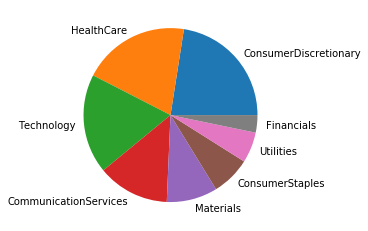

In [53]:
pie_portfolio(sector_scores, sectors, 8)